# Results

In [1]:
# import required libraries for reading, exploring and transforming data
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import date2num
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
os.listdir('comparison')

['comparison.csv', 'comparison.pkl', 'Losses', 'Models', 'Predictions', 'ssss']

### Comparison Tabel

In [3]:
comp= pd.read_pickle(os.path.join('comparison','comparison.pkl')).reset_index(drop=True)

In [4]:
comp

,model,time,rmse
0,Fourier Transform,0.034534,2.621366
1,SARIMA,149.854580,7.869614
2,TBATS,2420.605045,4.043840
3,RNN,2388.185251,2.780198
4,LSTM,2502.685699,2.441975
5,LSTM_More_N,2722.658126,2.319289
6,LSTM_2Layers,6626.589133,2.409003


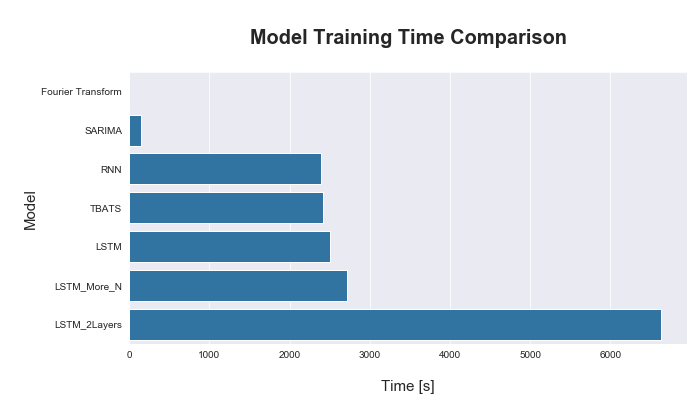

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('\nModel Training Time Comparison\n', fontsize=20 ,fontweight='bold')
sns.barplot(x='time',y='model',data=comp.sort_values(by='time',ascending=True), color='tab:blue')
plt.ylabel('\nModel', fontsize=15)
plt.xlabel('\nTime [s]', fontsize=15)
plt.show()

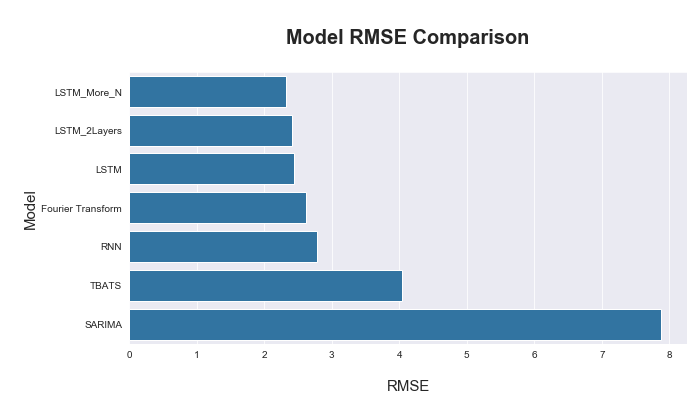

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('\nModel RMSE Comparison\n', fontsize=20 ,fontweight='bold')
sns.barplot(x='rmse',y='model',data=comp.sort_values(by='rmse',ascending=True), color='tab:blue')
plt.ylabel('\nModel', fontsize=15)
plt.xlabel('\nRMSE', fontsize=15)
plt.show()

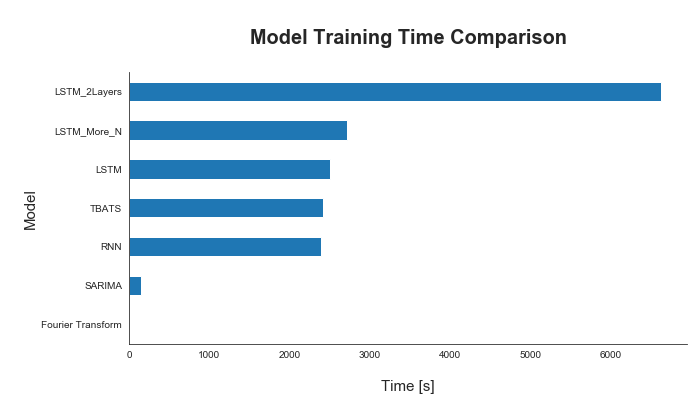

In [7]:
sns.set_style('white')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('\nModel Training Time Comparison\n', fontsize=20 ,fontweight='bold')
comp.set_index('model').time.sort_values().plot(kind='barh',figsize=(10,5),ax=ax)
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
plt.ylabel('\nModel', fontsize=15)
plt.xlabel('\nTime [s]', fontsize=15)
plt.show()

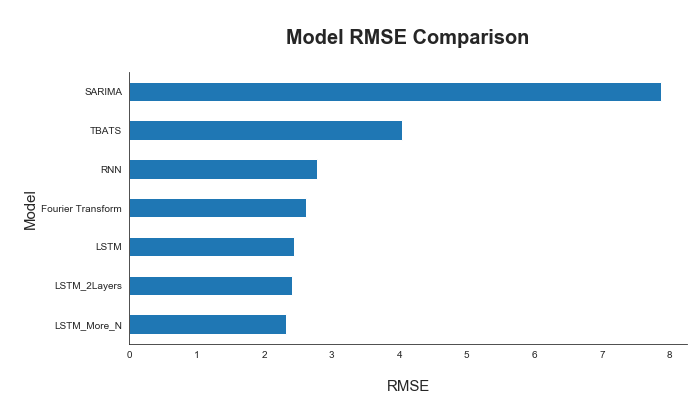

In [8]:
sns.set_style('white')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('\nModel RMSE Comparison\n', fontsize=20 ,fontweight='bold')
comp.set_index('model').rmse.sort_values().plot(kind='barh',figsize=(10,5),ax=ax)
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
plt.ylabel('\nModel', fontsize=15)
plt.xlabel('\nRMSE', fontsize=15)
plt.show()

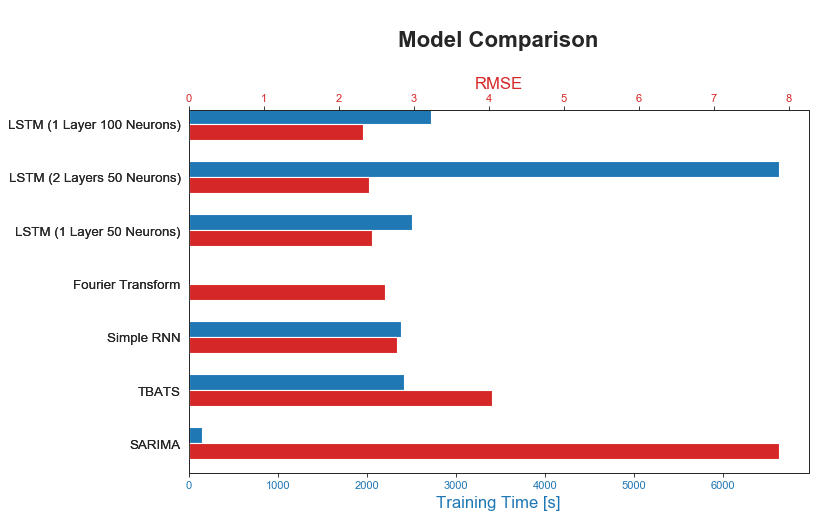

In [9]:
sns.set_style('white')
fig = plt.figure(figsize=(10,6),dpi=80)
ax = fig.add_subplot(111)
plt.title('\nModel Comparison\n', fontsize=20 ,fontweight='bold')

comp.set_index('model').rename_axis(None).sort_values(by='rmse',ascending=False).time.plot(kind='barh',
                                                                         color='tab:blue',
#                                                                          figsize=(10,6),
                                                                         position=0,
                                                                         width=0.3,
                                                                         ax=ax)

ax.set_xlabel('Training Time [s]', color='tab:blue', fontsize=15)
ax.tick_params(axis='x', labelcolor='tab:blue')

ax2 = ax.twiny()

comp.set_index('model').rename_axis(None).sort_values(by='rmse',ascending=False).rmse.plot(kind='barh',
                                                                         color='tab:red',
#                                                                          figsize=(10,6),
                                                                         position=1,
                                                                         width=0.3,
                                                                         ax=ax2)

ax2.set_xlabel('RMSE', color='tab:red', fontsize=15)
ax2.tick_params(axis='x', labelcolor='tab:red')


ytl= ['LSTM (1 Layer 100 Neurons)','LSTM (2 Layers 50 Neurons)','LSTM (1 Layer 50 Neurons)',
      'Fourier Transform','Simple RNN','TBATS','SARIMA']
ax.set_yticklabels(ytl[::-1], fontsize=12)
ax2.set_yticklabels(ytl[::-1], fontsize=12)
plt.show()

### Train Test Data

In [10]:
df= pd.read_csv(os.path.join('datasets_transformed','data_resampled_noisy_outliers.csv'), parse_dates=True, index_col=0)
train_df= df.iloc[:7*int(len(df)/8)]
test_df= df.iloc[7*int(len(df)/8):]

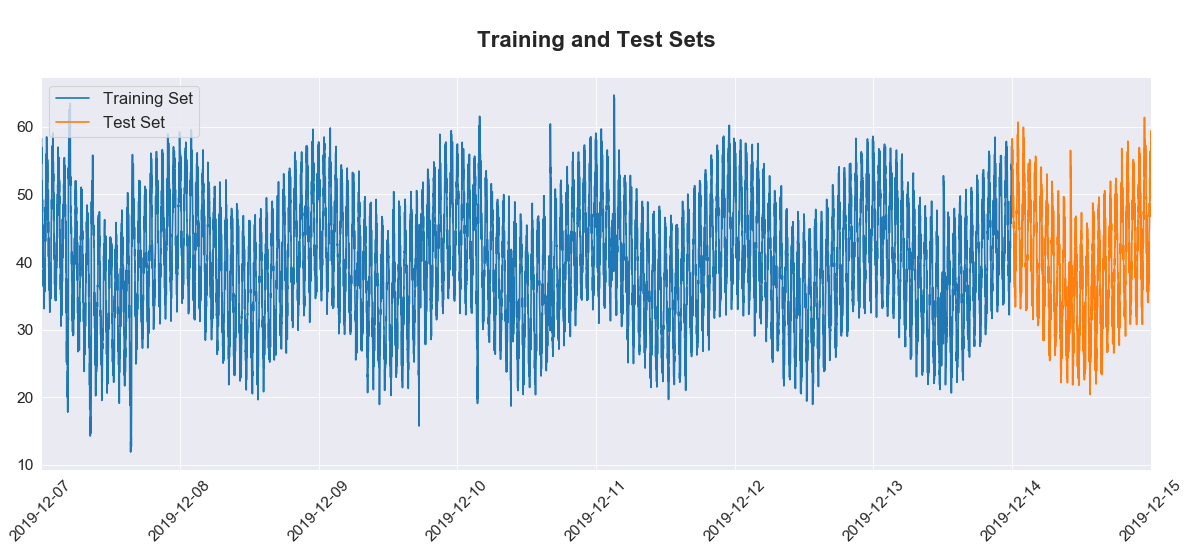

In [11]:
# plot data with outliers
sns.set_style('darkgrid')
plt.figure(figsize=(15,7), dpi=80)
plt.plot(train_df, label='Training Set')
plt.plot(test_df, label='Test Set')
plt.title('\nTraining and Test Sets\n', fontsize=20, fontweight='bold')
plt.legend(loc=2 ,prop={'size': 15})
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

### Predictions

In [12]:
lst=[]
for name in os.listdir(os.path.join('comparison','Predictions')):
    df= pd.read_pickle(os.path.join('comparison','Predictions',name))
    lst.append(df)
preds= pd.concat(lst, axis=1)

In [13]:
test= pd.read_csv('datasets_transformed/data_resampled_noisy_outliers.csv', 
                  parse_dates=True, index_col=0).iloc[-1441:]

In [14]:
preds

,FFT,lstm_2_preds,lstm_preds_more,lstm_preds,rnn_preds,SARIMA_preds,tbats_forecast
2019-12-14 00:00:00,56.063693,55.281376,55.101315,54.046658,54.082481,55.676780,55.801422
2019-12-14 00:01:00,55.952071,55.121807,54.943348,53.850483,53.876049,55.337739,55.713461
2019-12-14 00:02:00,55.731989,55.176556,55.143303,54.253315,54.780300,55.940512,55.537157
2019-12-14 00:03:00,55.405852,54.918762,54.927528,53.938759,54.967594,55.049294,55.246639
2019-12-14 00:04:00,54.977228,54.290924,54.366665,53.246235,53.923599,54.786959,54.857505
...,...,...,...,...,...,...,...
2019-12-14 23:56:00,55.419177,55.007240,54.482414,53.515701,53.875622,55.079953,55.220543
2019-12-14 23:57:00,55.741602,55.177242,54.711143,53.640675,53.863983,54.445915,55.529720
2019-12-14 23:58:00,55.957878,55.301922,54.957321,53.860863,53.855114,54.994780,55.740353
2019-12-14 23:59:00,56.065635,55.470131,55.229218,54.160767,54.497620,56.214320,55.850402


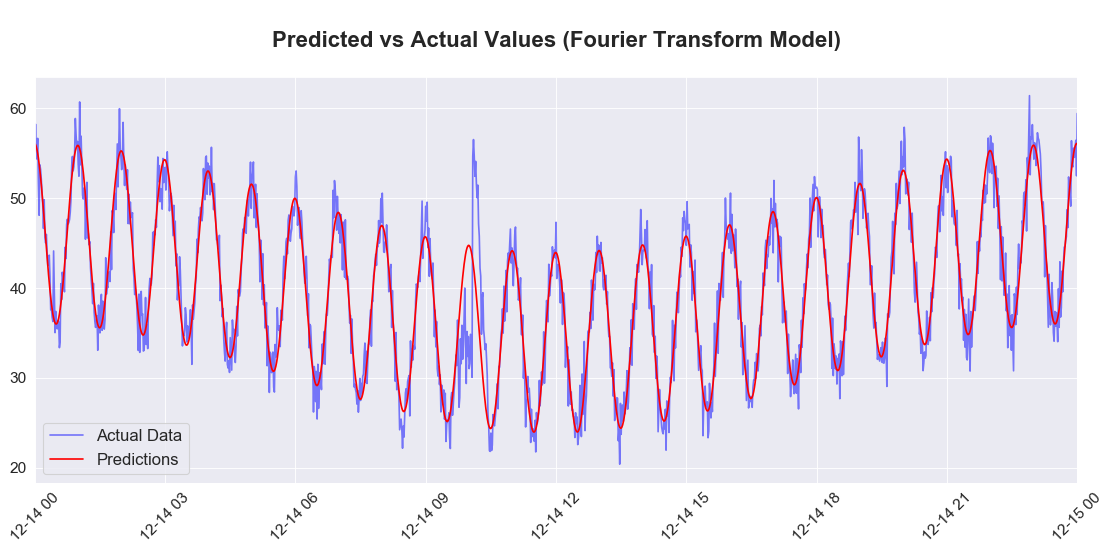

In [15]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nPredicted vs Actual Values (Fourier Transform Model)\n',fontsize=20, fontweight='bold')
plt.plot(test, 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.FFT, 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

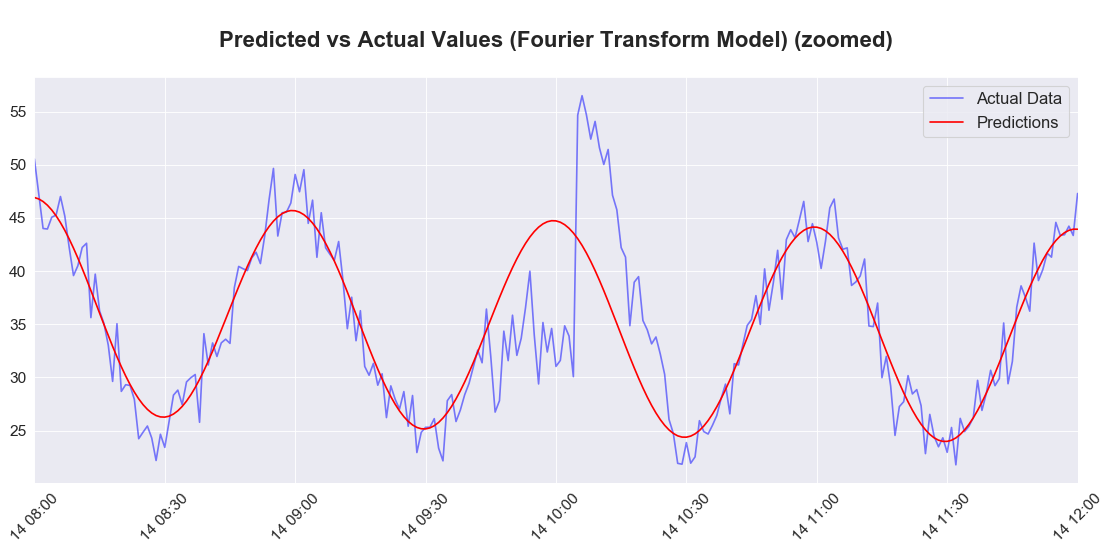

In [16]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nPredicted vs Actual Values (Fourier Transform Model) (zoomed)\n',fontsize=20, fontweight='bold')
plt.plot(test[8*60:12*60+1], 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.FFT[8*60:12*60+1], 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

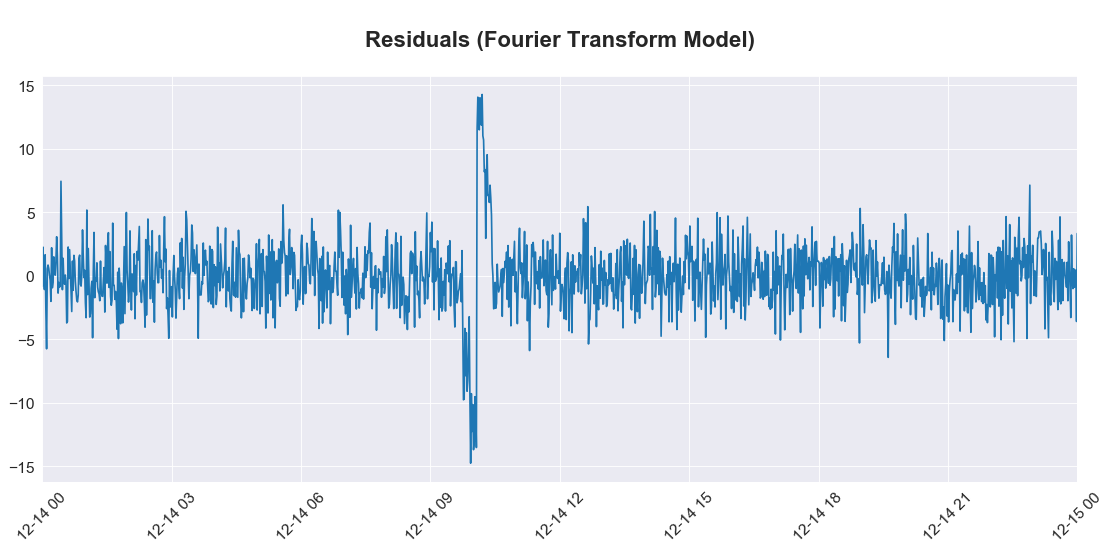

In [17]:
# plot residuals
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nResiduals (Fourier Transform Model)\n',fontsize=20, fontweight='bold')
plt.plot(test.index,test.values.flatten()-preds.FFT.values.flatten())
plt.autoscale(axis='x', tight=True)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()

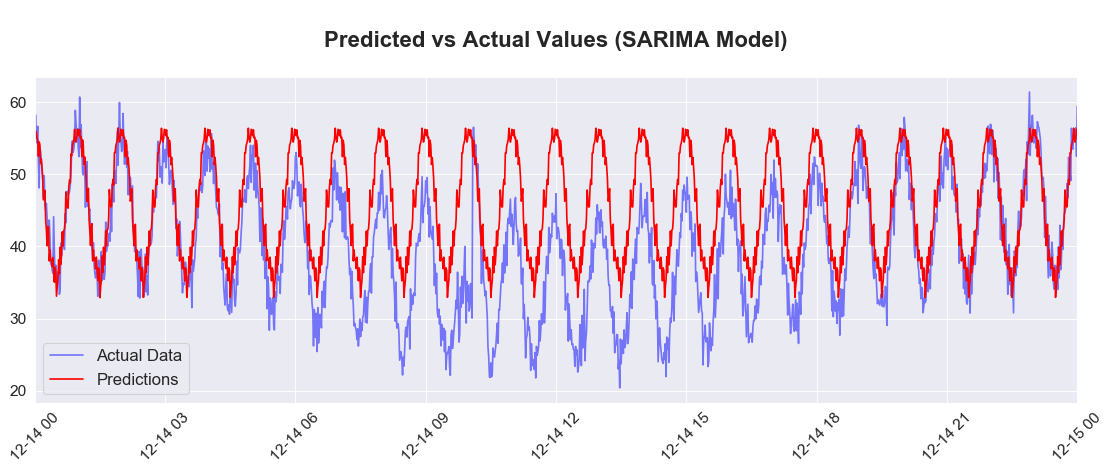

In [18]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6), dpi=80)
plt.title('\nPredicted vs Actual Values (SARIMA Model)\n',fontsize=20, fontweight='bold')
plt.plot(test, 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.SARIMA_preds, 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

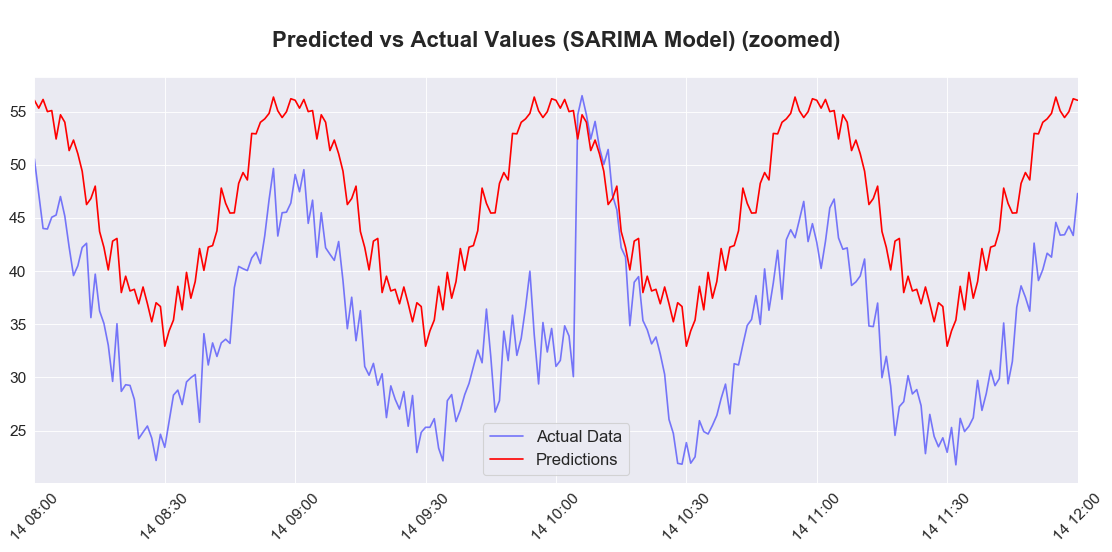

In [19]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nPredicted vs Actual Values (SARIMA Model) (zoomed)\n',fontsize=20, fontweight='bold')
plt.plot(test[8*60:12*60+1], 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.SARIMA_preds[8*60:12*60+1], 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

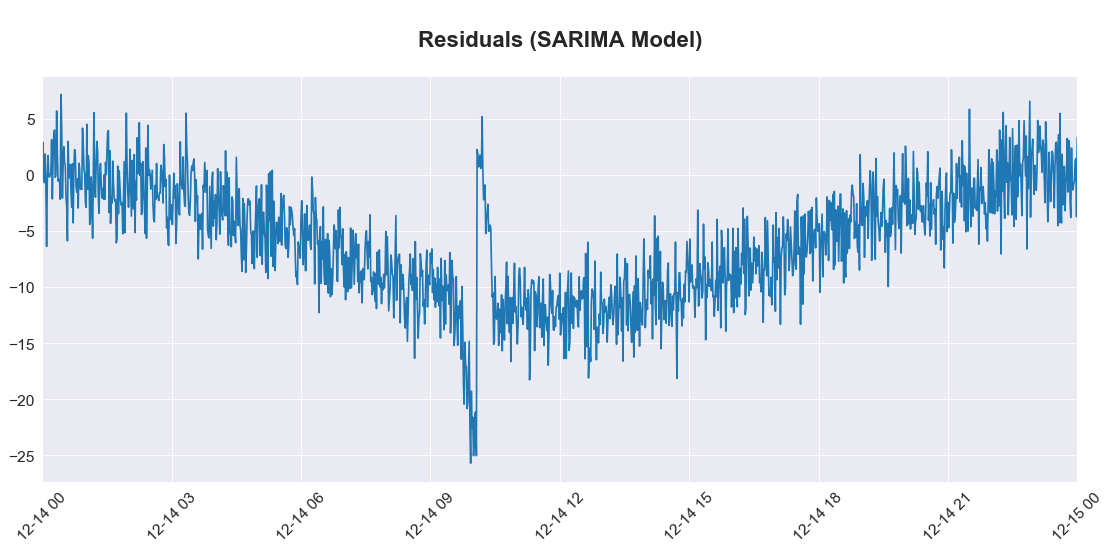

In [20]:
# plot residuals
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nResiduals (SARIMA Model)\n',fontsize=20, fontweight='bold')
plt.plot(test.index,test.values.flatten()-preds.SARIMA_preds.values.flatten())
plt.autoscale(axis='x', tight=True)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()

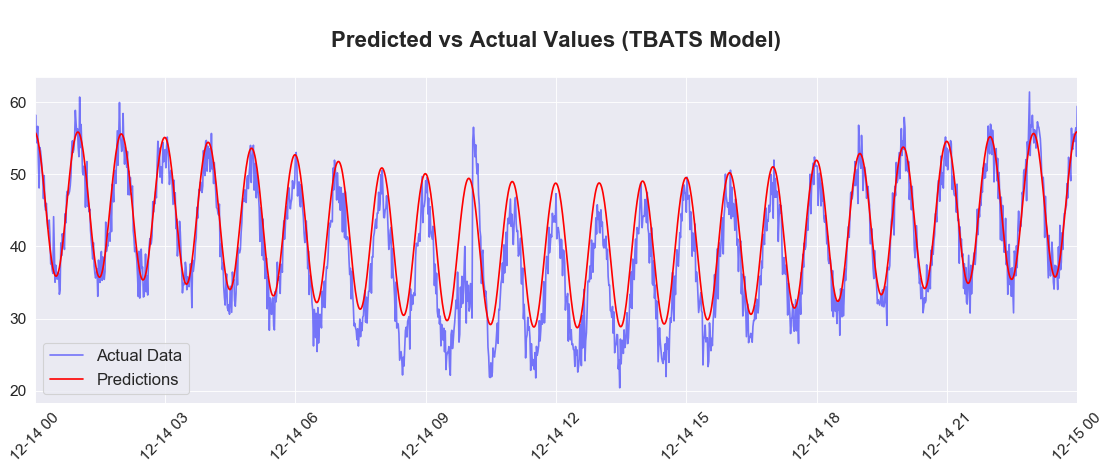

In [21]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6), dpi=80)
plt.title('\nPredicted vs Actual Values (TBATS Model)\n',fontsize=20, fontweight='bold')
plt.plot(test, 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.tbats_forecast, 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

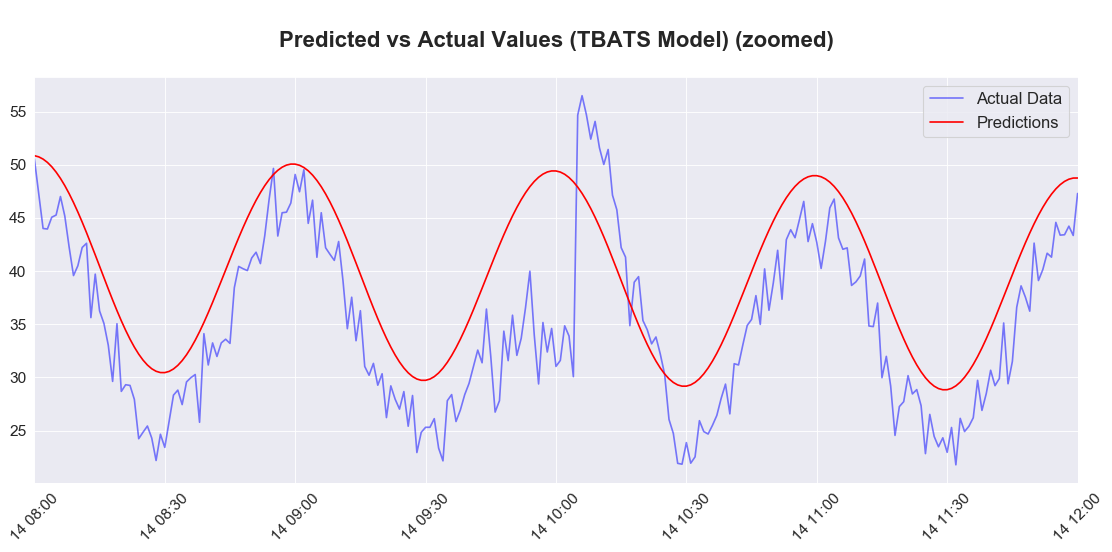

In [22]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nPredicted vs Actual Values (TBATS Model) (zoomed)\n',fontsize=20, fontweight='bold')
plt.plot(test[8*60:12*60+1], 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.tbats_forecast[8*60:12*60+1], 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

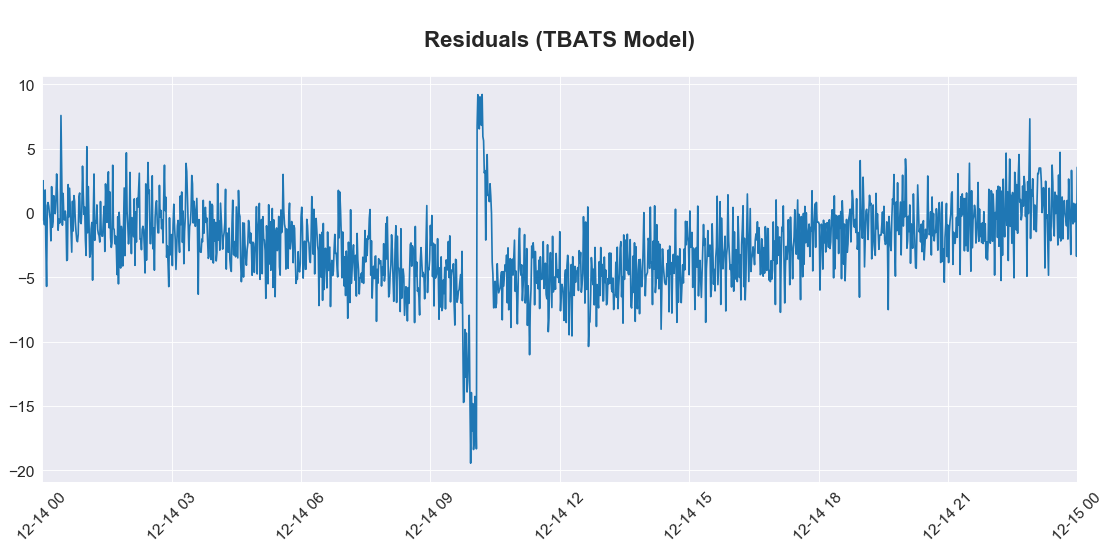

In [23]:
# plot residuals
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nResiduals (TBATS Model)\n',fontsize=20, fontweight='bold')
plt.plot(test.index,test.values.flatten()-preds.tbats_forecast.values.flatten())
plt.autoscale(axis='x', tight=True)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()

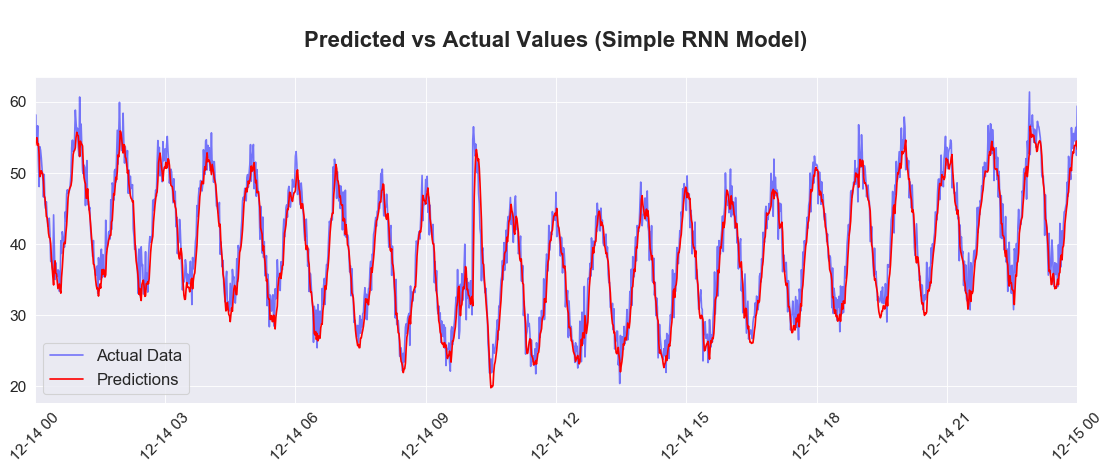

In [24]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6), dpi=80)
plt.title('\nPredicted vs Actual Values (Simple RNN Model)\n',fontsize=20, fontweight='bold')
plt.plot(test, 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.rnn_preds, 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

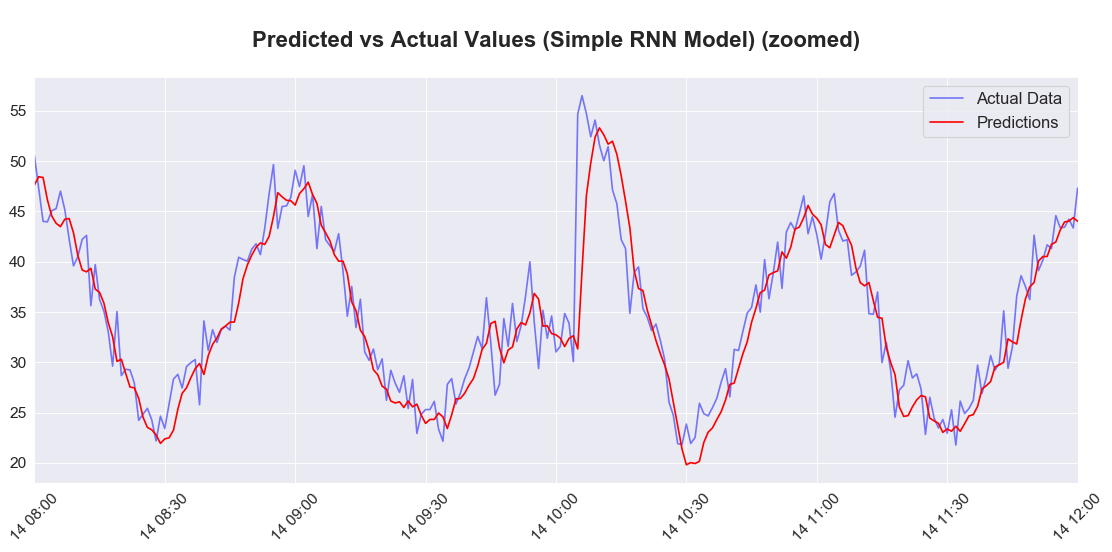

In [25]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nPredicted vs Actual Values (Simple RNN Model) (zoomed)\n',fontsize=20, fontweight='bold')
plt.plot(test[8*60:12*60+1], 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.rnn_preds[8*60:12*60+1], 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

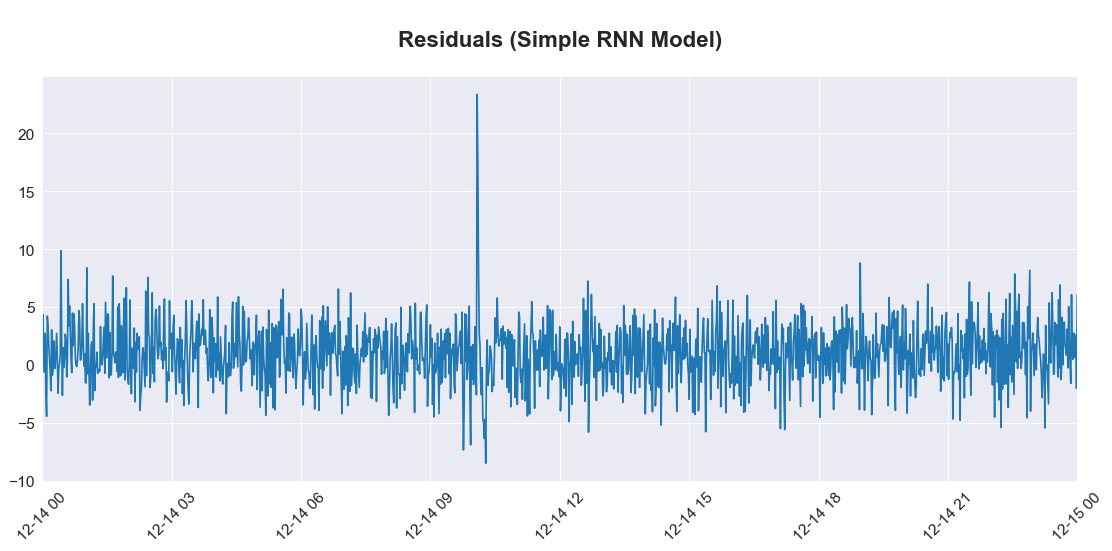

In [26]:
# plot residuals
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nResiduals (Simple RNN Model)\n',fontsize=20, fontweight='bold')
plt.plot(test.index,test.values.flatten()-preds.rnn_preds.values.flatten())
plt.autoscale(axis='x', tight=True)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()

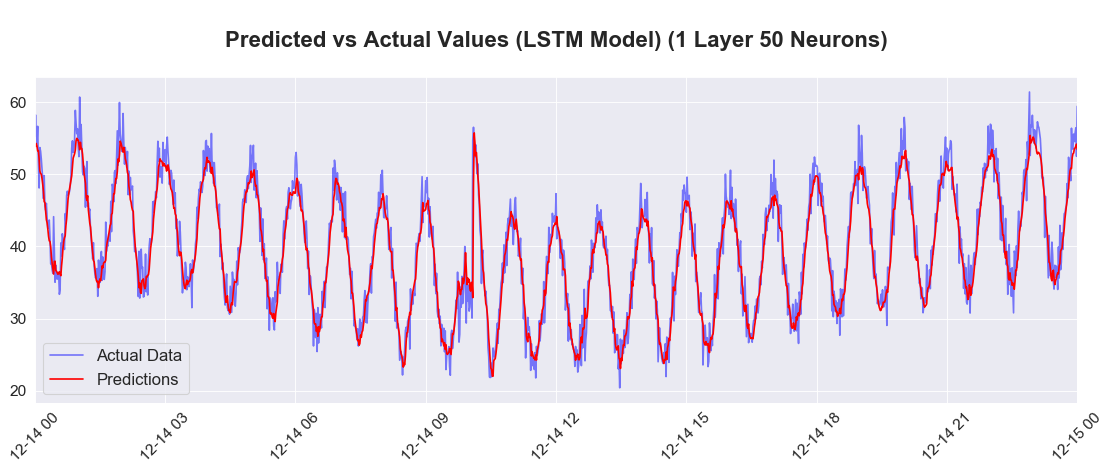

In [27]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6), dpi=80)
plt.title('\nPredicted vs Actual Values (LSTM Model) (1 Layer 50 Neurons)\n',fontsize=20, fontweight='bold')
plt.plot(test, 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.lstm_preds, 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

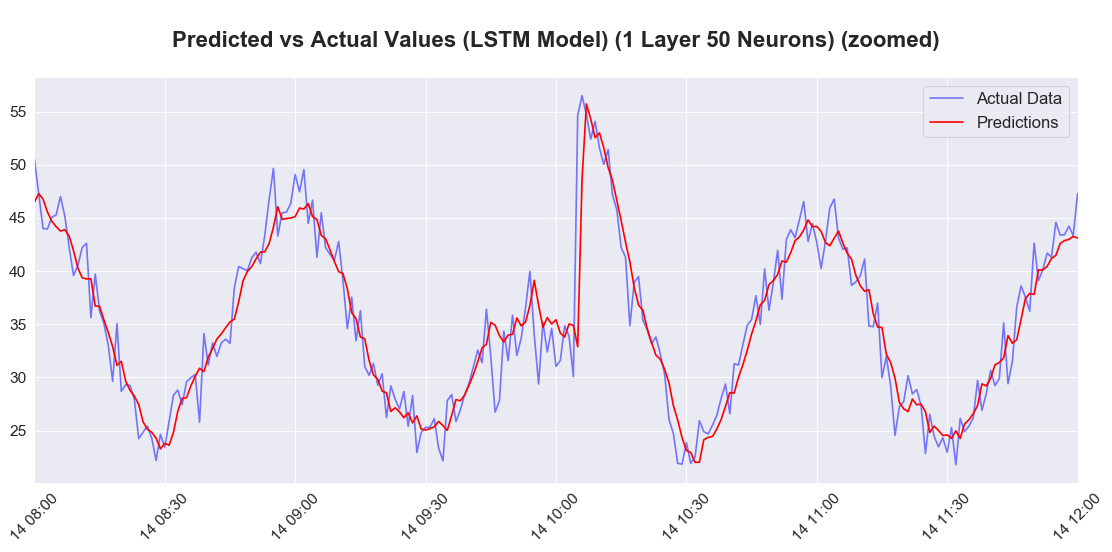

In [28]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nPredicted vs Actual Values (LSTM Model) (1 Layer 50 Neurons) (zoomed)\n',fontsize=20, fontweight='bold')
plt.plot(test[8*60:12*60+1], 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.lstm_preds[8*60:12*60+1], 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

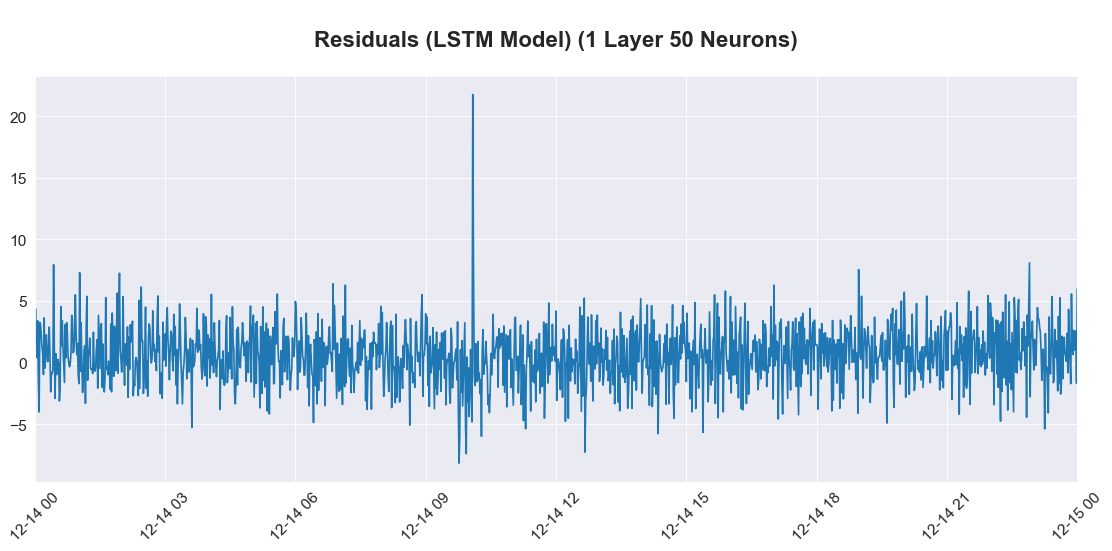

In [29]:
# plot residuals
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nResiduals (LSTM Model) (1 Layer 50 Neurons)\n',fontsize=20, fontweight='bold')
plt.plot(test.index,test.values.flatten()-preds.lstm_preds.values.flatten())
plt.autoscale(axis='x', tight=True)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()

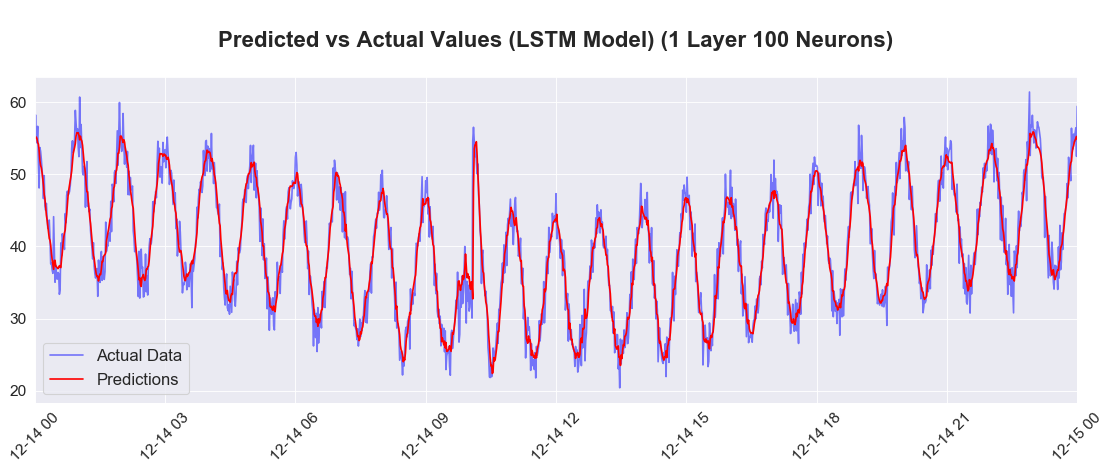

In [30]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6), dpi=80)
plt.title('\nPredicted vs Actual Values (LSTM Model) (1 Layer 100 Neurons)\n',fontsize=20, fontweight='bold')
plt.plot(test, 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.lstm_preds_more, 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

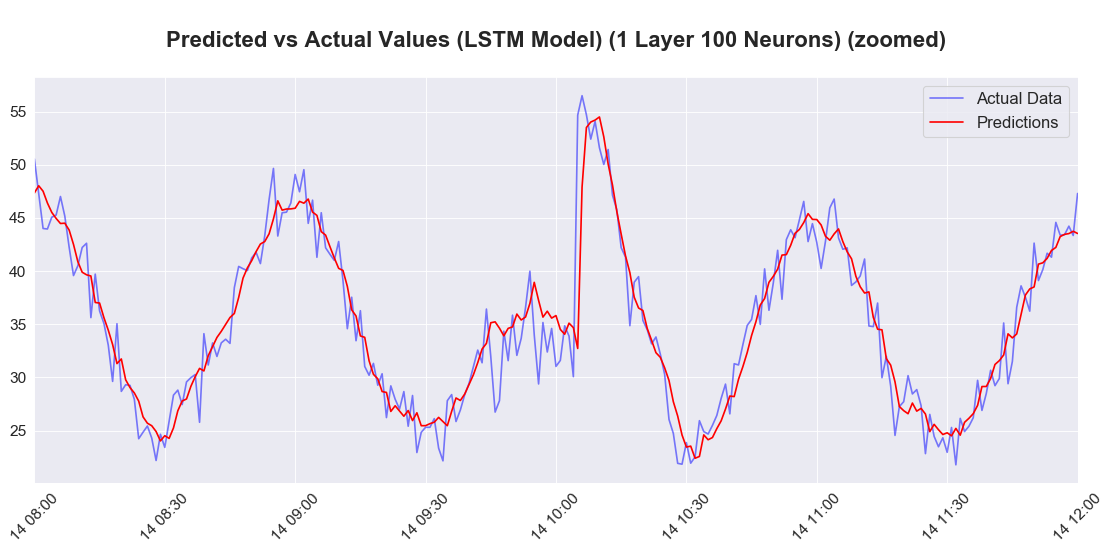

In [31]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nPredicted vs Actual Values (LSTM Model) (1 Layer 100 Neurons) (zoomed)\n',fontsize=20, fontweight='bold')
plt.plot(test[8*60:12*60+1], 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.lstm_preds_more[8*60:12*60+1], 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

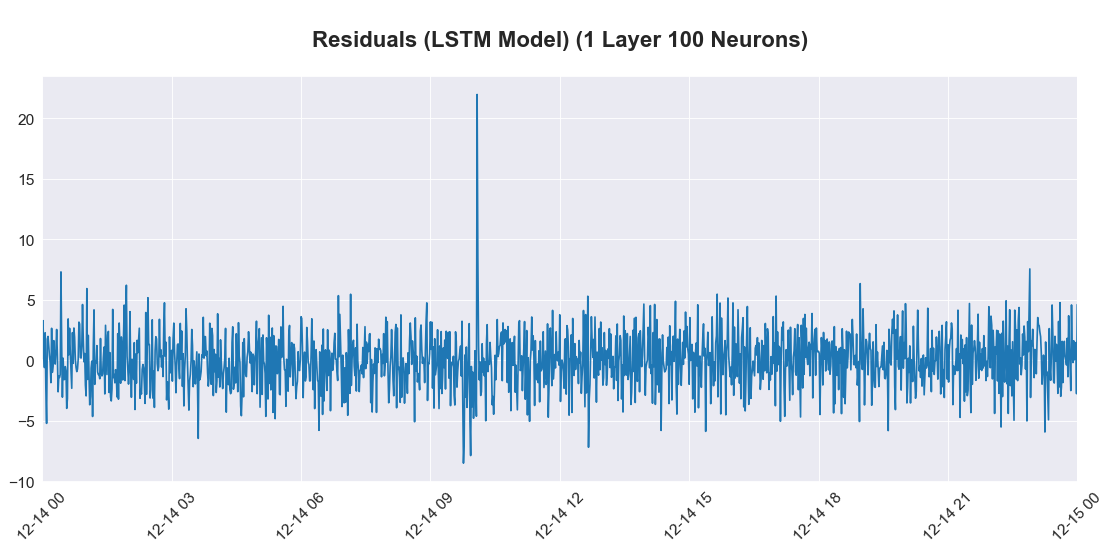

In [32]:
# plot residuals
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nResiduals (LSTM Model) (1 Layer 100 Neurons)\n',fontsize=20, fontweight='bold')
plt.plot(test.index,test.values.flatten()-preds.lstm_preds_more.values.flatten())
plt.autoscale(axis='x', tight=True)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()

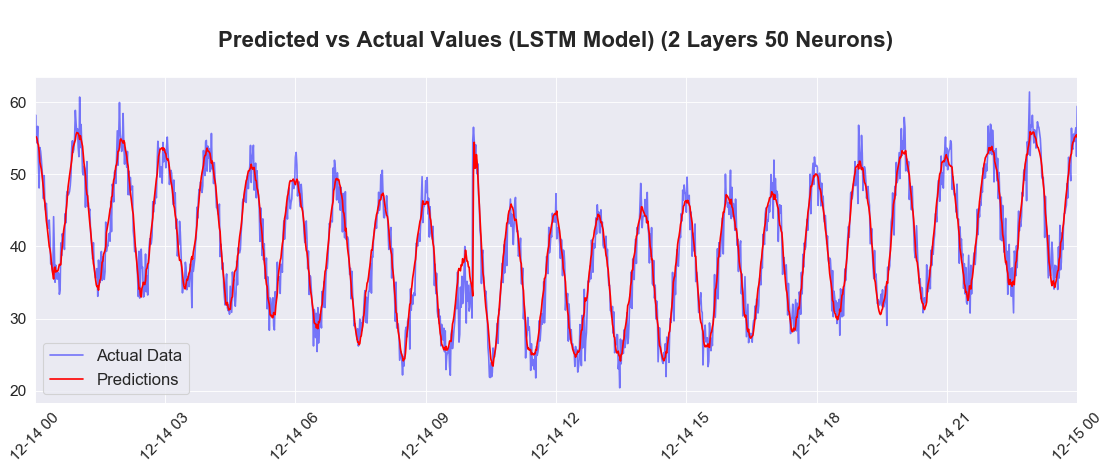

In [33]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6), dpi=80)
plt.title('\nPredicted vs Actual Values (LSTM Model) (2 Layers 50 Neurons)\n',fontsize=20, fontweight='bold')
plt.plot(test, 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.lstm_2_preds, 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

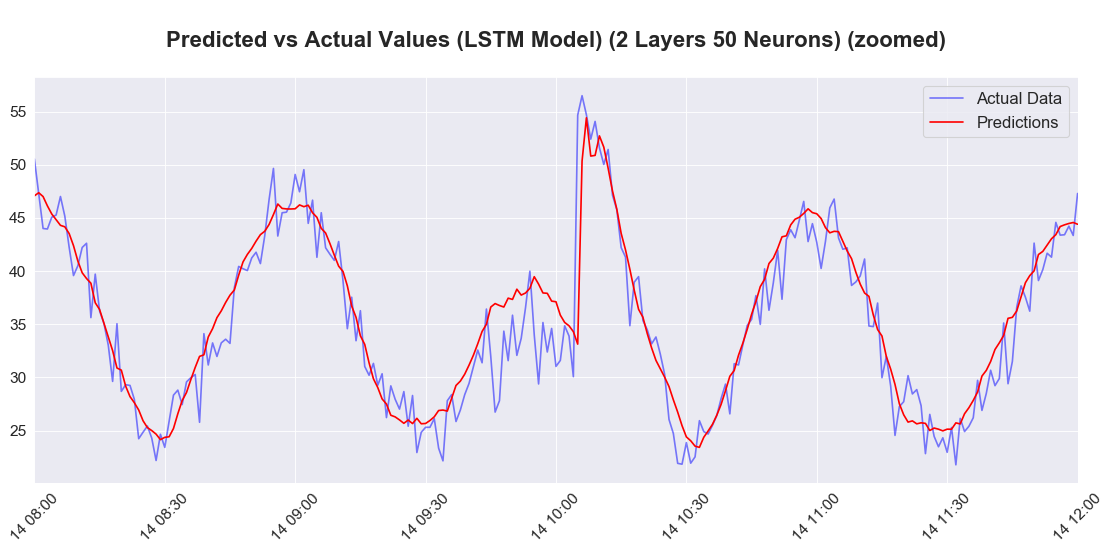

In [34]:
# plot predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nPredicted vs Actual Values (LSTM Model) (2 Layers 50 Neurons) (zoomed)\n',fontsize=20, fontweight='bold')
plt.plot(test[8*60:12*60+1], 'b', label = 'Actual Data', alpha=0.5)
plt.plot(preds.lstm_2_preds[8*60:12*60+1], 'r', label = 'Predictions')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.autoscale(axis='x', tight=True)
plt.tight_layout()

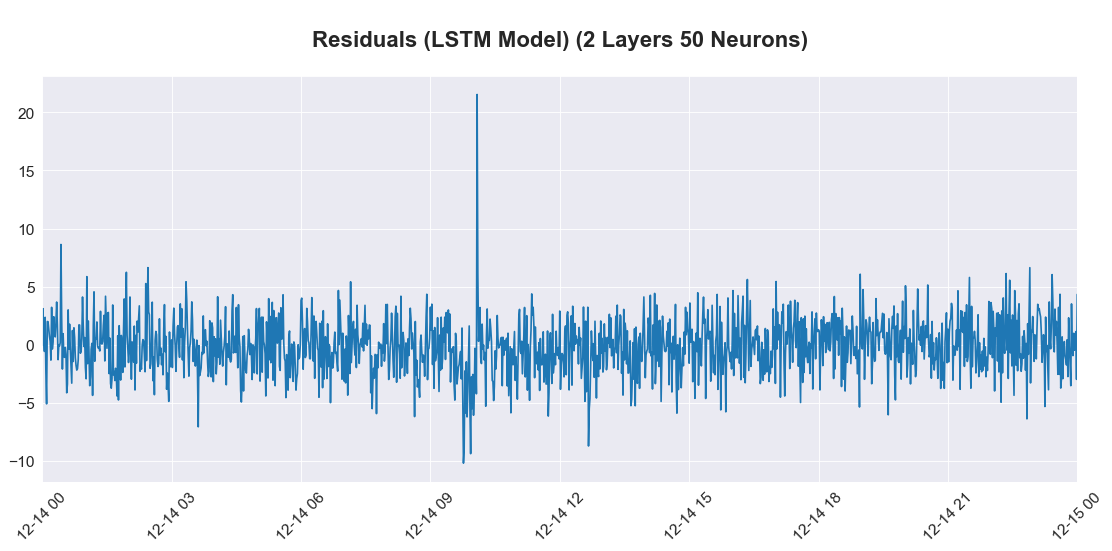

In [35]:
# plot residuals
plt.figure(figsize=(14,7), dpi=80)
plt.title('\nResiduals (LSTM Model) (2 Layers 50 Neurons)\n',fontsize=20, fontweight='bold')
plt.plot(test.index,test.values.flatten()-preds.lstm_2_preds.values.flatten())
plt.autoscale(axis='x', tight=True)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()

### NN Models Losses

In [36]:
os.listdir('comparison/Losses/')

['losses_lstm_2.pkl',
 'losses_lstm_less.pkl',
 'losses_lstm_more.pkl',
 'losses_rnn.pkl']

In [37]:
losses_lstm_2= pd.read_pickle(os.path.join('comparison','Losses','losses_lstm_2.pkl'))
losses_lstm_more= pd.read_pickle(os.path.join('comparison','Losses','losses_lstm_more.pkl'))
losses_rnn= pd.read_pickle(os.path.join('comparison','Losses','losses_rnn.pkl'))
losses_lstm_less= pd.read_pickle(os.path.join('comparison','Losses','losses_lstm_less.pkl'))

In [38]:
losses_rnn

,loss,val_loss
0,0.004178,0.002892
1,0.002973,0.002790
2,0.002838,0.002566
3,0.002756,0.002639
4,0.002710,0.002419
5,0.002689,0.002563
6,0.002702,0.002503
7,0.002649,0.002756


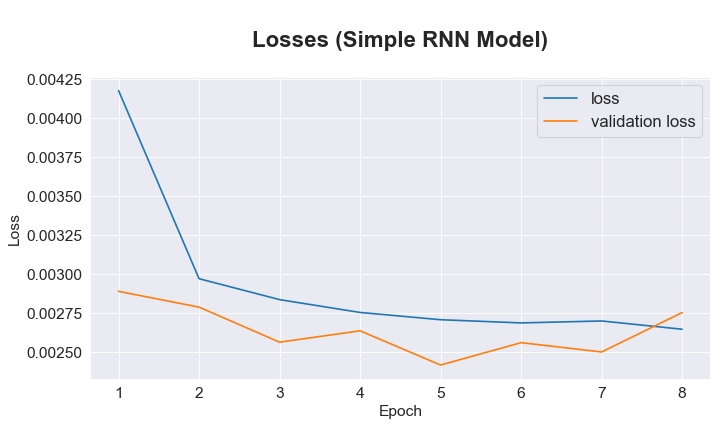

In [42]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(range(1,9), losses_rnn)
plt.title('\nLosses (Simple RNN Model)\n',fontsize=20, fontweight='bold')
plt.legend(['loss','validation loss'],prop={'size': 15},loc=1)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(ticks=list(range(1,9)),fontsize=14)
plt.yticks(fontsize=14)
plt.show()

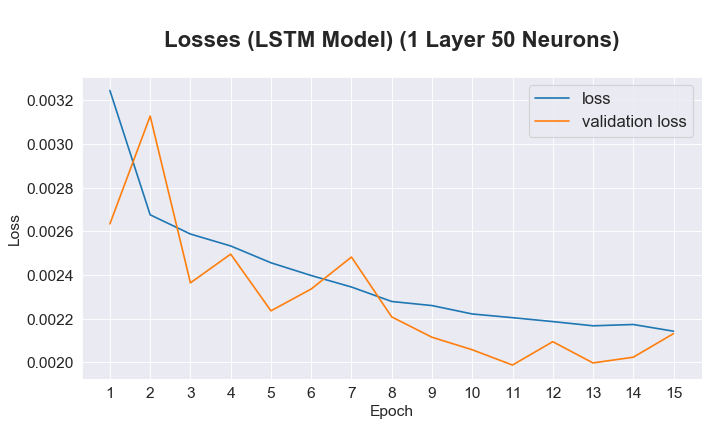

In [43]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(range(1,16), losses_lstm_less)
plt.title('\nLosses (LSTM Model) (1 Layer 50 Neurons)\n',fontsize=20, fontweight='bold')
plt.legend(['loss','validation loss'],prop={'size': 15})
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(ticks=list(range(1,16)),fontsize=14)
plt.yticks(fontsize=14)
plt.show()

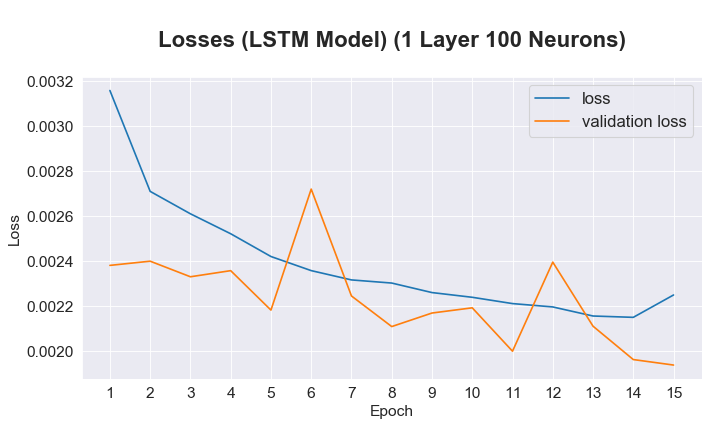

In [44]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(range(1,16), losses_lstm_more)
plt.title('\nLosses (LSTM Model) (1 Layer 100 Neurons)\n',fontsize=20, fontweight='bold')
plt.legend(['loss','validation loss'],prop={'size': 15})
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(ticks=list(range(1,16)),fontsize=14)
plt.yticks(fontsize=14)
plt.show()

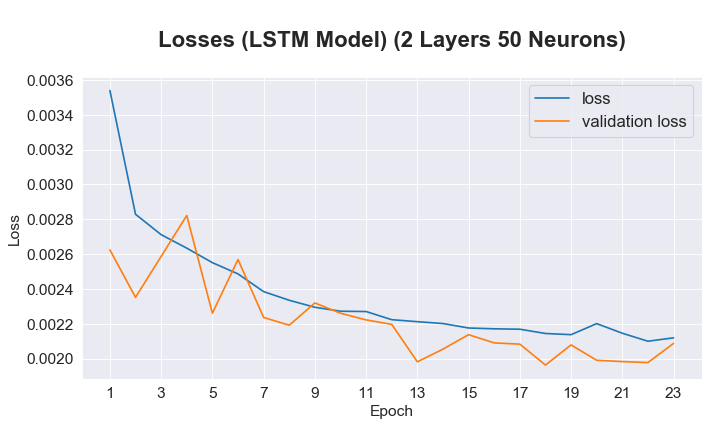

In [47]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(range(1,24), losses_lstm_2)
plt.title('\nLosses (LSTM Model) (2 Layers 50 Neurons)\n',fontsize=20, fontweight='bold')
plt.legend(['loss','validation loss'],prop={'size': 15})
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(ticks=list(range(1,24,2)),fontsize=14)
plt.yticks(fontsize=14)
plt.show()